In [ ]:
pip install gym numpy matplotlib


In [ ]:
!pip install -q swig
!pip install -q gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Episode 1/1000, Total Reward: -370.52705463146356
Episode 2/1000, Total Reward: -242.44018880161804
Episode 3/1000, Total Reward: -400.46454961071146
Episode 4/1000, Total Reward: -248.72396918121208
Episode 5/1000, Total Reward: -526.7721772633715
Episode 6/1000, Total Reward: -222.20155328307018
Episode 7/1000, Total Reward: -323.0815643141799
Episode 8/1000, Total Reward: -332.2776290555811
Episode 9/1000, Total Reward: -529.4206072709649
Episode 10/1000, Total Reward: -157.2596631449446
Episode 11/1000, Total Reward: -324.82965818791286
Episode 12/1000, Total Reward: -441.1565839310574
Episode 13/1000, Total Reward: -380.34552335191387
Episode 14/1000, Total Reward: -180.59952466481448
Episode 15/1000, Total Reward: -86.43231421748712
Episode 16/1000, Total Reward: -223.48233035044922
Episode 17/1000, Total Reward: -144.00661336036043
Episode 18/1000, Total Reward: -295.028246815853
Episode 19/1000, Total Reward: -258.00088579061656
Episode 20/1000, Total Reward: -269.4228832894815

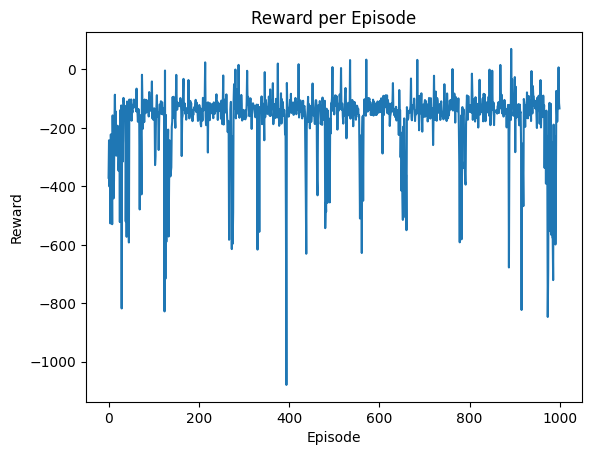

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

class AgenteQLearning:
    def __init__(self, env, taxa_aprendizado=0.15, fator_desconto=0.85, epsilon=1.0, decaimento_epsilon=0.75, epsilon_minimo=0.02 ):
        self.env = env
        self.taxa_aprendizado = taxa_aprendizado
        self.fator_desconto = fator_desconto
        self.epsilon = epsilon
        self.decaimento_epsilon = decaimento_epsilon
        self.epsilon_minimo = epsilon_minimo

        self.espaco_observacao_min = env.observation_space.low
        self.espaco_observacao_max = env.observation_space.high
        self.binagens_espaco_observacao = 20
        self.formato_espaco_observacao = tuple([self.binagens_espaco_observacao] * env.observation_space.shape[0])
        self.acao_n = env.action_space.n
        self.tabela_q = np.zeros(self.formato_espaco_observacao + (self.acao_n,))

    def discretizar_estado(self, estado):
        indices_estado = []
        for i in range(len(estado)):
            indice_estado = int(np.linspace(0, self.binagens_espaco_observacao - 1, self.binagens_espaco_observacao)[i])
            indices_estado.append(indice_estado)
        return tuple(indices_estado)

    def escolher_acao(self, estado):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.tabela_q[estado])

    def atualizar_tabela_q(self, estado, acao, recompensa, proximo_estado):
        proximo_estado_discreto = self.discretizar_estado(proximo_estado)
        melhor_proxima_acao = np.argmax(self.tabela_q[proximo_estado_discreto])
        alvo_td = recompensa + self.fator_desconto * self.tabela_q[proximo_estado_discreto + (melhor_proxima_acao,)]
        erro_td = alvo_td - self.tabela_q[estado + (acao,)]
        self.tabela_q[estado][acao] += self.taxa_aprendizado * erro_td

        if self.epsilon > self.epsilon_minimo:
            self.epsilon *= self.decaimento_epsilon

def treinar_agente(agente, num_episodios=1000):
    recompensas = []
    for episodio in range(num_episodios):
        estado = agente.discretizar_estado(env.reset())
        recompensa_total = 0
        done = False
        while not done:
            acao = agente.escolher_acao(estado)
            proximo_estado, recompensa, done, _ = env.step(acao)
            proximo_estado = agente.discretizar_estado(proximo_estado)
            agente.atualizar_tabela_q(estado, acao, recompensa, proximo_estado)
            estado = proximo_estado
            recompensa_total += recompensa
        recompensas.append(recompensa_total)
        print(f"Episódio {episodio+1}/{num_episodios}, Recompensa Total: {recompensa_total}")
    return recompensas

def plotar_recompensas(recompensas):
    plt.plot(recompensas)
    plt.xlabel('Episódio')
    plt.ylabel('Recompensa')
    plt.title('Recompensa por Episódio')
    plt.show()

if __name__ == "__main__":
    env = gym.make('LunarLander-v2')
    agente = AgenteQLearning(env)
    recompensas = treinar_agente(agente)
    plotar_recompensas(recompensas)
